# World Population EDA 2

In [6]:
import pandas as pd 
import numpy as np

In [8]:
df = pd.read_excel(r"C:\Users\IVANN\Documents\World_population.xlsx")
pd.set_option('display.float_format', lambda x: '%.2f'%x)
df.head()

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771.00,38972230.00,33753499.00,28189672.00,19542982.00,10694796.00,12486631.00,10752971.00,652230.00,63.06,1.03,0.52
1,138,ALB,Albania,Tirana,Europe,2842321.00,2866849.00,2882481.00,2913399.00,3182021.00,3295066.00,2941651.00,2324731.00,28748.00,98.87,1.00,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225.00,43451666.00,39543154.00,35856344.00,30774621.00,25518074.00,18739378.00,13795915.00,2381741.00,18.85,1.02,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273.00,46189.00,51368.00,54849.00,58230.00,47818.00,32886.00,27075.00,199.00,222.48,0.98,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824.00,77700.00,71746.00,71519.00,66097.00,53569.00,35611.00,19860.00,468.00,170.56,1.01,0.00


In [12]:
df['Continent'].nunique()
df['Continent'].unique()
df['Continent'].value_counts()

Continent
Africa           57
Asia             50
Europe           50
North America    40
Oceania          23
South America    14
Name: count, dtype: int64

In [10]:
df[(df['Continent']=='Africa') & (df['2022 Population']>100000000)].sort_values(by='2022 Population', ascending=False)

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
149,6,NGA,Nigeria,Abuja,Africa,218541212.00,208327405.00,183995785.00,160952853.00,122851984.00,95214257.00,72951439.00,55569264.00,923768.00,236.58,1.02,2.74
63,12,ETH,Ethiopia,Addis Ababa,Africa,123379924.00,117190911.00,102471895.00,89237791.00,67031867.00,47878073.00,34945469.00,28308246.00,1104300.00,111.73,1.03,1.55
57,14,EGY,Egypt,Cairo,Africa,110990103.00,107465134.00,97723799.00,87252413.00,71371371.00,57214630.00,43748556.00,34781986.00,1002450.00,110.72,1.02,1.39


In [90]:
df[(df['Continent']=='Asia') & (df['2022 Population']>100000000)].sort_values(by='2022 Population', ascending=False)

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
41,1,CHN,China,Beijing,Asia,1425887337.00,1424929781.00,1393715448.00,1348191368.00,1264099069.00,1153704252.00,982372466.00,822534450.00,9706961.00,146.89,1.00,17.88
92,2,IND,India,New Delhi,Asia,1417173173.00,1396387127.00,1322866505.00,1240613620.00,1059633675.00,NaN,NaN,557501301.00,3287590.00,431.07,1.01,17.77
93,4,IDN,Indonesia,Jakarta,Asia,275501339.00,271857970.00,259091970.00,244016173.00,214072421.00,182159874.00,148177096.00,115228394.00,1904569.00,144.65,1.01,3.45
156,5,PAK,Pakistan,Islamabad,Asia,235824862.00,227196741.00,210969298.00,194454498.00,154369924.00,115414069.00,80624057.00,59290872.00,881912.00,267.40,1.02,2.96
16,8,BGD,Bangladesh,Dhaka,Asia,171186372.00,167420951.00,157830000.00,148391139.00,129193327.00,107147651.00,83929765.00,67541860.00,147570.00,1160.04,1.01,2.15
102,11,JPN,Japan,Tokyo,Asia,123951692.00,125244761.00,127250933.00,128105431.00,126803861.00,123686321.00,117624196.00,105416839.00,377930.00,327.98,0.99,1.55
163,13,PHL,Philippines,Manila,Asia,115559009.00,112190977.00,103031365.00,94636700.00,77958223.00,61558898.00,48419546.00,37435586.00,342353.00,337.54,1.01,1.45


In [14]:
df.shape

(234, 17)

In [16]:
# show proportions
# manual % derivation
100*df['Continent'].value_counts()/df.shape[0]
# easier percentile check
100*df['Continent'].value_counts(normalize=True)

Continent
Africa          24.36
Asia            21.37
Europe          21.37
North America   17.09
Oceania          9.83
South America    5.98
Name: proportion, dtype: float64

In [18]:
df.groupby('Continent').agg({'2022 Population':['mean','max','count','sum'],'2020 Population':['mean','max','count','sum']})

2022 Population                                    \
                         mean           max count           sum   
Continent                                                         
Africa            25455879.68  218541212.00    56 1425529262.00   
Asia              96327387.31 1425887337.00    49 4720041978.00   
Europe            15055371.82  144713314.00    49  737713219.00   
North America     15007403.40  338289857.00    40  600296136.00   
Oceania            2046386.32   26177413.00    22   45020499.00   
South America     31201186.29  215313498.00    14  436816608.00   

              2020 Population                                    
                         mean           max count           sum  
Continent                                                        
Africa            23871435.26  208327405.00    57 1360671810.00  
Asia              94955134.37 1424929781.00    49 4652801584.00  
Europe            14915843.92  145617329.00    50  745792196.00  
North America     14855914.82  335942003.00    40  594236593.00  
Oceania            1910148.96   25670051.00    23   43933426.00  
South America     30823574.50  213196304.00    14  431530043.00

In [20]:
# measuring population in recent year across continents

df.groupby('Continent').agg({'2022 Population':['mean']}).sort_values(by=('2022 Population', 'mean'), ascending=False)

,2022 Population
,mean
Continent,
Asia,96327387.31
South America,31201186.29
Africa,25455879.68
Europe,15055371.82
North America,15007403.40
Oceania,2046386.32


In [22]:
# measuring growth rate across countries

df.groupby('Continent').agg({'Growth Rate':['mean']}).sort_values(by=('Growth Rate', 'mean'), ascending=False)

,Growth Rate
,mean
Continent,
Africa,1.02
Asia,1.01
South America,1.01
Oceania,1.01
North America,1.00
Europe,1.00


In [24]:
df.groupby('Continent').agg({'World Population Percentage':['mean']}).sort_values(by=('World Population Percentage', 'mean'), ascending=False)

,World Population Percentage
,mean
Continent,
Asia,1.18
South America,0.39
Africa,0.31
North America,0.19
Europe,0.19
Oceania,0.02


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

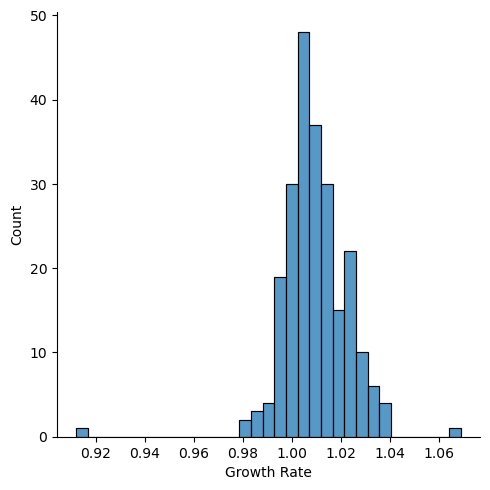

In [28]:
sns.displot(df['Growth Rate'])

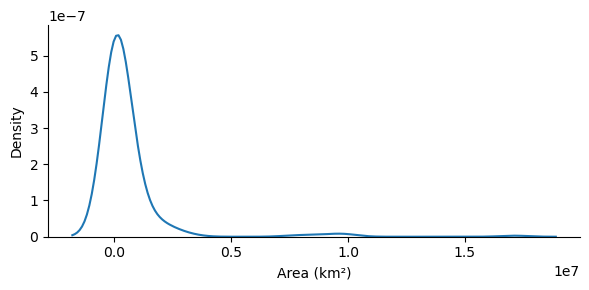

In [50]:
sns.displot(df['Area (km²)'], kind = 'kde', height = 3, aspect =2)

In [84]:
df
#df.sort_values(by='Area(km²)', ascending=False)

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771.00,38972230.00,33753499.00,28189672.00,19542982.00,10694796.00,12486631.00,10752971.00,652230.00,63.06,1.03,0.52
1,138,ALB,Albania,Tirana,Europe,2842321.00,2866849.00,2882481.00,2913399.00,3182021.00,3295066.00,2941651.00,2324731.00,28748.00,98.87,1.00,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225.00,43451666.00,39543154.00,35856344.00,30774621.00,25518074.00,18739378.00,13795915.00,2381741.00,18.85,1.02,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273.00,46189.00,51368.00,54849.00,58230.00,47818.00,32886.00,27075.00,199.00,222.48,0.98,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824.00,77700.00,71746.00,71519.00,66097.00,53569.00,35611.00,19860.00,468.00,170.56,1.01,0.00
5,42,AGO,Angola,Luanda,Africa,35588987.00,33428485.00,28127721.00,23364185.00,16394062.00,11828638.00,8330047.00,6029700.00,1246700.00,28.55,1.03,0.45
6,224,AIA,Anguilla,The Valley,North America,15857.00,15585.00,14525.00,13172.00,11047.00,8316.00,6560.00,6283.00,91.00,174.25,1.01,0.00
7,201,ATG,Antigua and Barbuda,Saint John’s,North America,93763.00,92664.00,89941.00,85695.00,75055.00,63328.00,64888.00,64516.00,442.00,212.13,1.01,0.00
8,33,ARG,Argentina,Buenos Aires,South America,45510318.00,45036032.00,43257065.00,41100123.00,37070774.00,32637657.00,28024803.00,23842803.00,2780400.00,16.37,1.01,0.57
9,140,ARM,Armenia,Yerevan,Asia,2780469.00,2805608.00,2878595.00,2946293.00,3168523.00,3556539.00,3135123.00,2534377.00,29743.00,93.48,1.00,0.03
